<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/Predict_ATP_tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
import shap
import kagglehub
import os




1. **`import pandas as pd`**:
   - Imports the Pandas library, which is used for data manipulation and analysis. It provides data structures like DataFrames that make it easy to handle structured data.

2. **`import numpy as np`**:
   - Imports the NumPy library, which is fundamental for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions.

3. **`import datetime`**:
   - Imports the built-in `datetime` module, which supplies classes for manipulating dates and times.

4. **`import matplotlib.pyplot as plt`**:
   - Imports the `pyplot` module from Matplotlib, a plotting library. It is used for creating static, interactive, and animated visualizations in Python.

5. **`import random`**:
   - Imports the built-in `random` module, which implements pseudo-random number generators for various distributions.

6. **`import seaborn as sns`**:
   - Imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.

7. **`from sklearn.preprocessing import LabelEncoder`**:
   - Imports the `LabelEncoder` class from Scikit-learn, which is used to convert categorical labels into numerical format, making them suitable for machine learning algorithms.

8. **`from sklearn.impute import SimpleImputer`**:
   - Imports the `SimpleImputer` class from Scikit-learn, which is used for handling missing data by filling in missing values with a specified strategy (like mean, median, or mode).

9. **`from sklearn.preprocessing import LabelBinarizer`**:
   - Imports the `LabelBinarizer` class from Scikit-learn, which converts categorical labels into a binary format (one-hot encoding), useful for machine learning tasks.

10. **`from sklearn.model_selection import train_test_split`**:
    - Imports the `train_test_split` function from Scikit-learn, which is used to split datasets into training and testing sets, helping to evaluate the performance of machine learning models.


11. **`from sklearn import utils`**: This imports utility functions from the `sklearn` (scikit-learn) library, which is widely used for machine learning in Python. The `utils` module provides functions for various tasks, such as data preprocessing or reshaping.

12. **`from sklearn.ensemble import RandomForestClassifier`**: This imports the `RandomForestClassifier` class from the ensemble module of scikit-learn. The Random Forest algorithm is an ensemble learning method used for classification tasks that builds multiple decision trees and merges them for a more accurate prediction.

13. **`from sklearn.metrics import confusion_matrix, classification_report, accuracy_score`**: This line imports several metrics used to evaluate the performance of classification models:
   - **`confusion_matrix`**: Generates a matrix to visualize the performance of a classifier, showing true vs. predicted labels.
   - **`classification_report`**: Provides a detailed report including precision, recall, f1-score, and support for each class in the classification task.
   - **`accuracy_score`**: Computes the accuracy of the model, which is the ratio of correctly predicted instances to the total instances.

14. **`from xgboost import XGBClassifier`**: This imports the `XGBClassifier` from the XGBoost library, which is an optimized implementation of gradient boosting. XGBoost is powerful for classification tasks and often leads to better performance compared to other algorithms.

15. **`import shap`**: This imports the SHAP (SHapley Additive exPlanations) library, which is used to explain the output of machine learning models. It provides insights into the contribution of each feature to the model's predictions.

16. **`import kagglehub`**: This imports the `kagglehub` library, which may be used to access datasets or functionalities provided by Kaggle, a popular platform for data science competitions.

17. **`import os`**: This imports the `os` module, which provides a way to interact with the operating system. It can be used for tasks such as file management, environment variable access, and directory operations.



In [2]:

# Download latest version
path = kagglehub.dataset_download("anupangadi/tennis-players-ranks-prediction-using-atp-elo")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file = os.path.join(path, filename)
        break  # Stop searching after finding the first CSV file

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)




100%|██████████| 35.1k/35.1k [00:00<00:00, 39.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anupangadi/tennis-players-ranks-prediction-using-atp-elo/versions/1


In [3]:
# Display some info about the loaded dataset
print(df.head())

             Player   Age     Elo HardRaw ClayRaw GrassRaw  \
0    Novak Djokovic  34.5  2185.2    2068  2016.3   1942.4   
1   Daniil Medvedev  25.9  2166.2  2095.3  1714.1   1723.4   
2  Alexander Zverev  24.7  2141.3  2056.7  1999.1   1671.4   
3     Roger Federer  39.9  2043.0  1936.7  1749.6   1813.4   
4    Carlos Alcaraz  18.5  2029.5  1906.3  1834.4   1441.4   

   hard court elo rating  clay-court elo rating  grass-court elo rating  \
0                 2126.6                 2100.8                  2063.8   
1                 2130.7                 1940.1                  1944.8   
2                 2099.0                 2070.2                  1906.4   
3                 1989.8                 1896.3                  1928.2   
4                 1967.9                 1932.0                  1735.5   

              Peak Match  Peak Age  Peak Elo Gender  Rank  
0           2016 Miami F      28.8    2470.0   Male     1  
1        2022 Atp Cup RR      25.9    2175.1   Male     

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  783 non-null    object 
 1   Age                     783 non-null    float64
 2   Elo                     783 non-null    float64
 3   HardRaw                 783 non-null    object 
 4   ClayRaw                 783 non-null    object 
 5   GrassRaw                783 non-null    object 
 6   hard court elo rating   783 non-null    float64
 7   clay-court elo rating   783 non-null    float64
 8   grass-court elo rating  783 non-null    float64
 9   Peak Match              783 non-null    object 
 10  Peak Age                783 non-null    float64
 11  Peak Elo                783 non-null    float64
 12  Gender                  783 non-null    object 
 13  Rank                    783 non-null    int64  
dtypes: float64(7), int64(1), object(6)
memory 

In [5]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Player                    0
Age                       0
Elo                       0
HardRaw                   0
ClayRaw                   0
GrassRaw                  0
hard court elo rating     0
clay-court elo rating     0
grass-court elo rating    0
Peak Match                0
Peak Age                  0
Peak Elo                  0
Gender                    0
Rank                      0
dtype: int64


In [6]:
# Checking basic statistics
print("\nDataset statistics:")
print(df.describe())



Dataset statistics:
              Age          Elo  hard court elo rating  clay-court elo rating  \
count  783.000000   783.000000             783.000000             783.000000   
mean    26.654917  1563.584291            1515.014943            1509.160153   
std      4.722972   194.965341             192.315096             182.468047   
min     15.500000  1032.100000            1010.300000             970.300000   
25%     23.300000  1418.500000            1379.750000            1370.550000   
50%     26.300000  1549.300000            1494.900000            1500.800000   
75%     29.800000  1694.900000            1638.550000            1640.350000   
max     42.600000  2185.200000            2130.700000            2100.800000   

       grass-court elo rating    Peak Age     Peak Elo        Rank  
count              783.000000  783.000000   783.000000  783.000000  
mean              1489.050830   23.657088  1685.551724  196.275862  
std                146.718487    3.510809   204.400

In [7]:
# Checking data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Player                     object
Age                       float64
Elo                       float64
HardRaw                    object
ClayRaw                    object
GrassRaw                   object
hard court elo rating     float64
clay-court elo rating     float64
grass-court elo rating    float64
Peak Match                 object
Peak Age                  float64
Peak Elo                  float64
Gender                     object
Rank                        int64
dtype: object


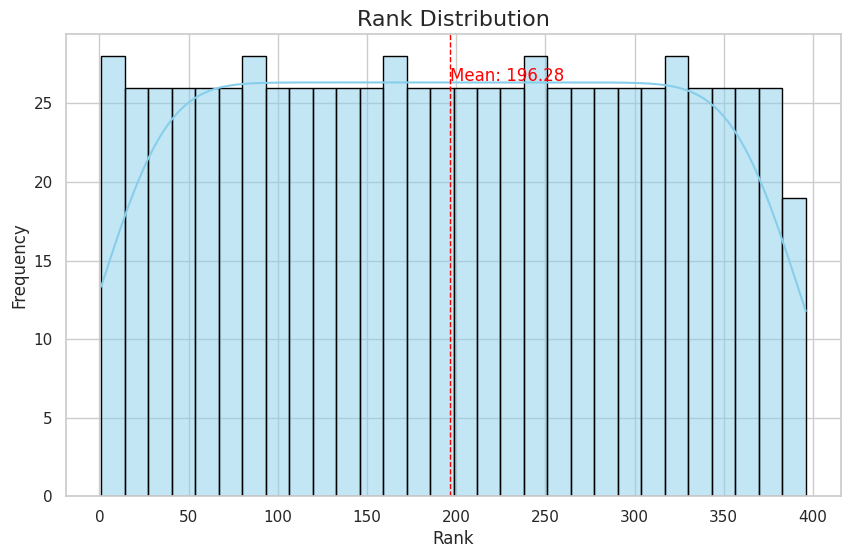

In [8]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Rank'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Rank Distribution", fontsize=16)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add a vertical line for mean/median
mean_rank = df['Rank'].mean()
plt.axvline(mean_rank, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_rank + 0.5, plt.ylim()[1]*0.9, f'Mean: {mean_rank:.2f}', color='red')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# Clean column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

In [16]:
# Verify if all expected columns are present
print("Columns in dataset after cleaning:")
print(df.columns)

Columns in dataset after cleaning:
Index(['Player', 'Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw',
       'hard court elo rating', 'clay-court elo rating',
       'grass-court elo rating', 'Peak Match', 'Peak Age', 'Peak Elo',
       'Gender', 'Rank'],
      dtype='object')


In [17]:
# Convert object columns to numeric where possible
# First, identify all object columns
object_cols = df.select_dtypes(include='object').columns
print("Object columns detected:", object_cols)

# Convert categorical columns to numerical where needed
label_encoder = LabelEncoder()
for col in object_cols:
    # Encode if column has only a few unique values (e.g., categorical)
    if df[col].nunique() < 20:  # assuming categorical if fewer than 20 unique values
        df[col] = label_encoder.fit_transform(df[col])
    else:
        # Try converting directly to numeric, set errors='coerce' to handle non-numeric values
        df[col] = pd.to_numeric(df[col], errors='coerce')



Object columns detected: Index(['Player', 'HardRaw', 'ClayRaw', 'GrassRaw', 'Peak Match'], dtype='object')


In [19]:
# Fill any remaining NaN values after conversion
imputer = SimpleImputer(strategy='mean')

# Fit and transform on the numerical features only
numerical_df = df.select_dtypes(include=np.number)
imputed_data = imputer.fit_transform(numerical_df)

# Update the numerical columns in the original DataFrame
df[numerical_df.columns] = imputed_data

# Verify data types after processing
print("\nData types after conversion:")
print(df.dtypes)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Player' 'Peak\xa0Match']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key

In [13]:
# Step 4: Preprocessing
# Convert categorical columns like 'Gender' to numeric
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Peak'] = label_encoder.fit_transform(df['Peakc'])


KeyError: 'Peak'

In [43]:
# Convert 'HardRaw', 'ClayRaw', and 'GrassRaw' to numeric if necessary
# Assume they contain non-numeric values; converting them to numerical values
for col in ['HardRaw', 'ClayRaw', 'GrassRaw', 'PeakMatch']:
    df[col] = pd.to_numeric(df[col], errors='coerce')



KeyError: 'PeakMatch'

In [35]:
df.head()

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,1,1
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2022 Atp Cup RR,25.9,2175.1,1,2
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,2022 Atp Cup RR,24.7,2157.9,1,3
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,2007 Dubai F,25.6,2382.0,1,4
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,2021 NextGen Finals F,18.5,2029.5,1,5


In [37]:
df.drop(['Player'], axis=1, inplace=True)

In [40]:
df.drop(['Peak Match'], axis=1, inplace=True)

KeyError: "['Peak Match'] not found in axis"

In [36]:
# Handle missing values (if any remain after conversion)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Novak\xa0Djokovic'